In [37]:
def matvec(w, A, lam):
    return A.T.dot(A.dot(w)) + lam * w


In [38]:
import time
import numpy as np

def conjugate_gradient(matvec, A, b, lam, tol=1e-6, max_iter=500):

    r0 = A.T.dot(b)

    n = A.shape[1]
    w = np.zeros(n)

    # Initial residual
    r = r0 - matvec(w, A, lam)
    p = r.copy()

    residuals = [np.linalg.norm(r)]
    start = time.time()

    for k in range(max_iter):
        Ap = matvec(p, A, lam)
        alpha = r.dot(r) / p.dot(Ap)

        w_new = w + alpha * p
        r_new = r - alpha * Ap

        residual_norm = np.linalg.norm(r_new)
        residuals.append(residual_norm)

        # Relative tolerance stopping rule
        if residual_norm / residuals[0] < 1e-4:
            break

        beta = r_new.dot(r_new) / r.dot(r)
        p = r_new + beta * p

        w, r = w_new, r_new

    runtime = time.time() - start

    return w, residuals, k+1, runtime


In [39]:
lambda_values = [0, 0.1, 1.0]
results = {}

for lam in lambda_values:
    w_cg, res_curve, iters, runtime = conjugate_gradient(matvec, A_train, b_train, lam)
    
    # Compute validation predictions
    b_pred = A_val.dot(w_cg)
    rmse = np.sqrt(np.mean((b_pred - b_val)**2))

    results[lam] = {
        "w": w_cg,
        "residuals": res_curve,
        "iterations": iters,
        "time": runtime,
        "rmse": rmse
    }

    print(f"λ={lam} | iter={iters} | time={runtime:.4f}s | val RMSE={rmse:.4f}")


λ=0 | iter=490 | time=22.5705s | val RMSE=0.9426
λ=0.1 | iter=475 | time=21.4895s | val RMSE=0.9426
λ=1.0 | iter=364 | time=16.7457s | val RMSE=0.9432


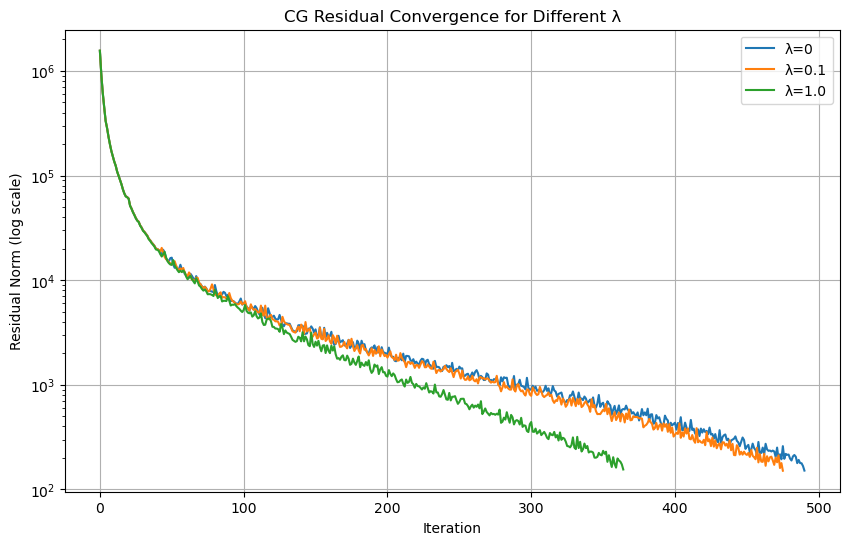

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for lam, info in results.items():
    plt.plot(info["residuals"], label=f"λ={lam}")

plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Residual Norm (log scale)")
plt.title("CG Residual Convergence for Different λ")
plt.legend()
plt.grid(True)
plt.show()


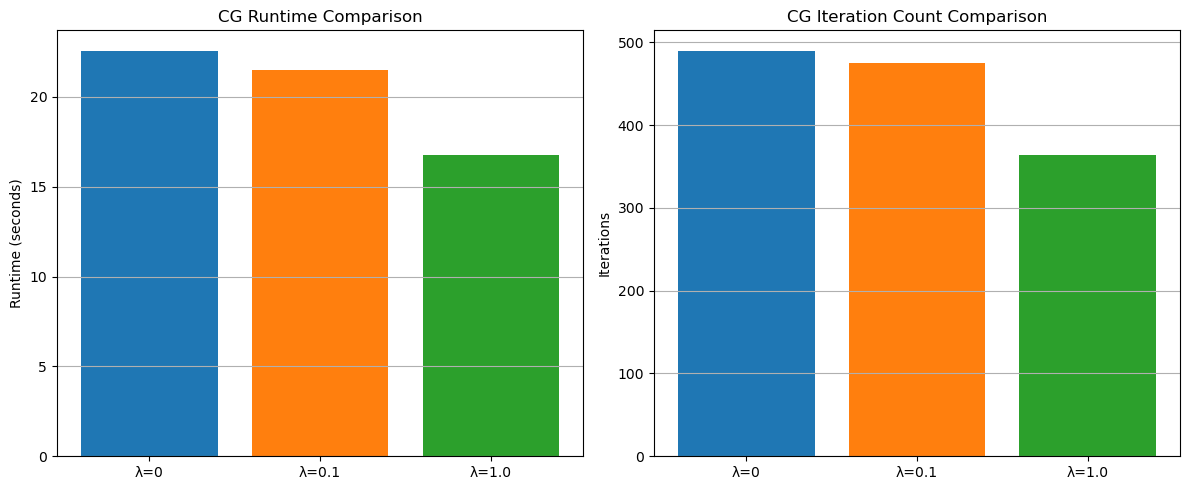

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lams = list(results.keys())
times = [results[lam]["time"] for lam in lams]
iters = [results[lam]["iterations"] for lam in lams]

x = np.arange(len(lams))

plt.figure(figsize=(12, 5))

#Runtime
plt.subplot(1, 2, 1)
plt.bar(x, times, color=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.xticks(x, [f"λ={lam}" for lam in lams])
plt.ylabel("Runtime (seconds)")

plt.title("CG Runtime Comparison")
plt.grid(axis="y")

#Iterations
plt.subplot(1, 2, 2)
plt.bar(x, iters, color=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.xticks(x, [f"λ={lam}" for lam in lams])
plt.ylabel("Iterations")
plt.title("CG Iteration Count Comparison")
plt.grid(axis="y")

plt.tight_layout()
plt.show()
